In [1]:
# !pip install sqlalchemy 
# !pip install pandas
# !pip install pyodbc
# !pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sqlalchemy import create_engine 

In [4]:
engine = create_engine("mssql+pyodbc://LAPTOP-09HP798D/AdventureWorks2022?trusted_connection=yes&driver=ODBC+Driver+17+For+SQL+Server")

In [5]:
engine = create_engine("mssql+pyodbc:///?odbc_connect=DRIVER={ODBC Driver 17 for SQL Server};SERVER=WORKSTATIONALFA\SQLEXPRESS;DATABASE=AdventureWorks2022;Trusted_Connection=yes")


<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\aghaa\AppData\Local\Temp\ipykernel_18548\196914510.py:1: SyntaxWarning: invalid escape sequence '\S'
  engine = create_engine("mssql+pyodbc:///?odbc_connect=DRIVER={ODBC Driver 17 for SQL Server};SERVER=WORKSTATIONALFA\SQLEXPRESS;DATABASE=AdventureWorks2022;Trusted_Connection=yes")


In [6]:
connection = engine.connect()

In [7]:
# -- 00100 -- Totalt antal produkter

df=pd.read_sql(sql='''

SELECT COUNT(*) AS [Totalt Antal Produkter]
FROM [AdventureWorks2022].[Production].[Product];

    ''', con=connection)

In [8]:
display(df)

,Totalt Antal Produkter
0,504


In [9]:
# -- 00110 -- Totalt Försäljnings Belopp

df=pd.read_sql(sql='''

SELECT CAST(SUM([TotalDue]) AS INT) AS [Totalt Försäljnings Belopp]
FROM [AdventureWorks2022].[Sales].[SalesOrderHeader];

    ''', con=connection)

In [10]:
display(df)

,Totalt Försäljnings Belopp
0,123216786


In [11]:
# -- 00120 -- Genomsnittligt Ordervärde

df=pd.read_sql(sql='''

SELECT CAST(AVG([TotalDue]) AS decimal(10,2)) AS [Genomsnittligt Ordervärde]
FROM [AdventureWorks2022].[Sales].[SalesOrderHeader];

    ''', con=connection)

In [12]:
display(df)

,Genomsnittligt Ordervärde
0,3916.0


In [13]:
# -- 00130 -- Totalt Spenderat Belopp

df=pd.read_sql(sql='''

SELECT TOP 10 [CustomerID], CAST(SUM([TotalDue]) AS int) AS [Totalt Spenderat Belopp]
FROM [AdventureWorks2022].[Sales].[SalesOrderHeader]
GROUP BY [CustomerID] ORDER BY [Totalt Spenderat Belopp] DESC;

    ''', con=connection)

In [14]:
display(df)

,CustomerID,Totalt Spenderat Belopp
0,29818,989184
1,29715,961676
2,29722,954022
3,30117,919802
4,29614,901347
5,29639,887090
6,29701,841867
7,29617,834476
8,29994,824332
9,29646,820384


In [15]:
# -- 00140 -- Företagets personal 

df=pd.read_sql(sql='''

SELECT COUNT([JobTitle]), [JobTitle]  
FROM [AdventureWorks2022].[humanresources].[employee]
GROUP BY [JobTitle]
ORDER BY [JobTitle];

    ''', con=connection)

In [16]:
display(df)

,,JobTitle
0,2,Accountant
1,1,Accounts Manager
2,2,Accounts Payable Specialist
3,3,Accounts Receivable Specialist
4,4,Application Specialist
...,...,...
62,3,Stocker
63,2,Tool Designer
64,1,Vice President of Engineering
65,1,Vice President of Production


In [17]:
# -- 00150 -- Antal och Kategorier av Personer i Företaget

df=pd.read_sql(sql='''

SELECT COUNT([PersonType]) AS [Antal], 
	CASE
		WHEN [persontype] = 'SC' THEN 'Store Contact'
		WHEN [persontype] = 'IN' THEN 'Individual (retail) customer'
		WHEN [persontype] = 'SP' THEN 'Sales person'
		WHEN [persontype] = 'EM' THEN 'Employee (non-sales)'
		WHEN [persontype] = 'VC' THEN 'Vendor contact'
		WHEN [persontype] = 'GC' THEN 'General contact'
	END AS [Kategori]
FROM [AdventureWorks2022].[Person].[Person]
GROUP BY [persontype];

    ''', con=connection)

In [18]:
display(df)

,Antal,Kategori
0,18484,Individual (retail) customer
1,273,Employee (non-sales)
2,17,Sales person
3,753,Store Contact
4,156,Vendor contact
5,289,General contact


In [19]:
# -- 00160 -- Avdelningar och antal anställda

df=pd.read_sql(sql='''

SELECT 
	A.[Name] AS [Avdelning], 
	COUNT(*) AS [Antal Anställda]
FROM [AdventureWorks2022].[HumanResources].[Department] AS A
JOIN [AdventureWorks2022].[HumanResources].[EmployeeDepartmentHistory] AS B 
ON A.[DepartmentID] = B.[DepartmentID]
GROUP BY A.[Name];

    ''', con=connection)

In [20]:
display(df)

,Avdelning,Antal Anställda
0,Engineering,7
1,Tool Design,4
2,Sales,18
3,Marketing,10
4,Purchasing,13
5,Research and Development,4
6,Production,180
7,Production Control,6
8,Human Resources,6
9,Finance,11


In [21]:
# -- 00170 -- Försäljning per produktkategori

df=pd.read_sql(sql='''

SELECT 
	E.[Name] AS [Produktkategori],
	CAST(SUM(B.[LineTotal]) AS INT) AS [Total delsumma]
FROM 
	[AdventureWorks2022].[Sales].[SalesOrderDetail] AS B 
	LEFT JOIN Production.Product AS C ON B.[ProductID] = C.[ProductID]
	JOIN Production.ProductSubcategory AS D ON C.[ProductSubcategoryID] = D.[ProductSubcategoryID]
	JOIN Production.ProductCategory AS E ON D.[ProductCategoryID] = E.[ProductCategoryID]
GROUP BY 
	E.[Name];

    ''', con=connection)

In [22]:
display(df)

,Produktkategori,Total delsumma
0,Clothing,2120542
1,Bikes,94651172
2,Accessories,1272072
3,Components,11802593


In [23]:
# -- 00200 -- Totalt antal kunder

df=pd.read_sql(sql= '''

SELECT 
	COUNT(DISTINCT [CustomerID]) AS [Totalt Antal Kunder]
FROM 
	[AdventureWorks2022].[Sales].[SalesOrderHeader];

    ''', con=connection)

In [24]:
display(df)

,Totalt Antal Kunder
0,19119


In [25]:
# -- 00300 -- Kundfördelning per Land

df=pd.read_sql(sql= '''

SELECT 
	T.[CountryRegionCode] AS [Land],
	COUNT(DISTINCT S.[CustomerID]) AS [Antal kunder]
FROM 
	[Sales].[SalesOrderHeader] AS S
    LEFT OUTER JOIN [Sales].[SalesTerritory] AS T
    ON S.[TerritoryID] = T.[TerritoryID]
GROUP BY 
    T.[CountryRegionCode]
ORDER BY 
	[Land];
    
    ''', con=connection)

In [26]:
display(df)

,Land,Antal kunder
0,AU,3625
1,CA,1677
2,DE,1812
3,FR,1844
4,GB,1951
5,US,8210


In [27]:
# -- 00400 -- Totalt antal beställningar 

df=pd.read_sql(sql= '''

SELECT 
	COUNT([SalesOrderID]) AS [Totalt Antal Beställningar]
FROM 
	[AdventureWorks2022].[Sales].[SalesOrderHeader];
        
    ''', con=connection)

In [28]:
display(df)

,Totalt Antal Beställningar
0,31465


In [29]:
# Totalt antal kunder i varje land delat efter år

df=pd.read_sql(sql= '''

SELECT 
	YEAR(S.[OrderDate]) AS [År],
	T.[CountryRegionCode] AS [Landskod],
	COUNT(DISTINCT [CustomerID]) AS [Antal kunder]
FROM 
	[Sales].[SalesOrderHeader] AS S
    LEFT OUTER JOIN [Sales].[SalesTerritory] AS T
    ON S.[TerritoryID] = T.[TerritoryID]
GROUP BY 
    YEAR(S.[OrderDate]), T.[CountryRegionCode]
ORDER BY 
	[År], [Landskod];
    
    ''', con=connection)

In [30]:
display(df)

,År,Landskod,Antal kunder
0,2011,AU,463
1,2011,CA,106
2,2011,DE,81
3,2011,FR,70
4,2011,GB,117
5,2011,US,569
6,2012,AU,892
7,2012,CA,302
8,2012,DE,249
9,2012,FR,262


In [31]:
# -- 00500 -- Antal beställningar per år

df=pd.read_sql(sql= '''

SELECT 
	YEAR([OrderDate]) AS [År],
	COUNT([SalesOrderID]) AS [Antal Beställningar]
FROM 
	[Sales].[SalesOrderHeader]
--	  WHERE YEAR([OrderDate]) IN ('2012', '2013')
GROUP BY 
    YEAR([OrderDate])
ORDER BY 
	YEAR([OrderDate]);
    
    ''', con=connection)

In [32]:
display(df)

,År,Antal Beställningar
0,2011,1607
1,2012,3915
2,2013,14182
3,2014,11761


In [33]:
# -- 00600 -- Antal beställningar per kvartal

df=pd.read_sql(sql= '''

SELECT 
    YEAR([OrderDate]) AS [År],
    DATEPART(QUARTER, [OrderDate]) AS [Kvartal],
    COUNT([SalesOrderID]) AS [Antal Beställningar]
FROM 
    [Sales].[SalesOrderHeader]
GROUP BY 
    YEAR([OrderDate]), DATEPART(QUARTER, [OrderDate])
ORDER BY 
    [År], [Kvartal]
        
    ''', con=connection)

In [34]:
display(df)

,År,Kvartal,Antal Beställningar
0,2011,2,184
1,2011,3,638
2,2011,4,785
3,2012,1,859
4,2012,2,952
5,2012,3,1022
6,2012,4,1082
7,2013,1,1166
8,2013,2,1575
9,2013,3,5320


In [35]:
# -- 00700 -- Antal beställningar per månad

df=pd.read_sql(sql= '''

SELECT 
	YEAR([OrderDate]) AS [År],
	MONTH([OrderDate]) AS [Månad],
	COUNT(SalesOrderID) AS [Ordrar]
FROM 
	[AdventureWorks2022].[Sales].[SalesOrderHeader]
GROUP BY 
	YEAR([OrderDate]), MONTH([OrderDate])
ORDER BY 
	[År], [Månad] ASC;
        
    ''', con=connection)

In [36]:
display(df)

,År,Månad,Ordrar
0,2011,5,43
1,2011,6,141
2,2011,7,231
3,2011,8,250
4,2011,9,157
5,2011,10,327
6,2011,11,230
7,2011,12,228
8,2012,1,336
9,2012,2,219


In [37]:
# -- 00800 -- Antal beställningar per land

df=pd.read_sql(sql= '''

SELECT 
	T.[CountryRegionCode] AS [Land],
	COUNT(S.[CustomerID]) AS [Antal beställningar]
FROM 
	[AdventureWorks2022].[Sales].[SalesOrderHeader] AS S
    LEFT OUTER JOIN [Sales].[SalesTerritory] AS T
    ON S.[TerritoryID] = T.[TerritoryID]
GROUP BY 
    T.[CountryRegionCode]
ORDER BY 
	[Land];
        
    ''', con=connection)

In [38]:
display(df)

,Land,Antal beställningar
0,AU,6843
1,CA,4067
2,DE,2623
3,FR,2672
4,GB,3219
5,US,12041


In [39]:
# -- 00900 -- Antal beställningar per land och år

df=pd.read_sql(sql= '''

SELECT 
	YEAR(S.[OrderDate]) AS [År],
	T.[CountryRegionCode] AS [Land],
	COUNT(S.[CustomerID]) AS [Antal Beställningar]
FROM 
	[AdventureWorks2022].[Sales].[SalesOrderHeader] AS S
    LEFT OUTER JOIN [Sales].[SalesTerritory] AS T
    ON S.[TerritoryID] = T.[TerritoryID]
GROUP BY 
    YEAR(S.[OrderDate]), T.[CountryRegionCode]
ORDER BY 
	[År], [Land];
            
    ''', con=connection)

In [40]:
display(df)

,År,Land,Antal Beställningar
0,2011,AU,463
1,2011,CA,149
2,2011,DE,81
3,2011,FR,70
4,2011,GB,117
5,2011,US,727
6,2012,AU,892
7,2012,CA,460
8,2012,DE,249
9,2012,FR,290


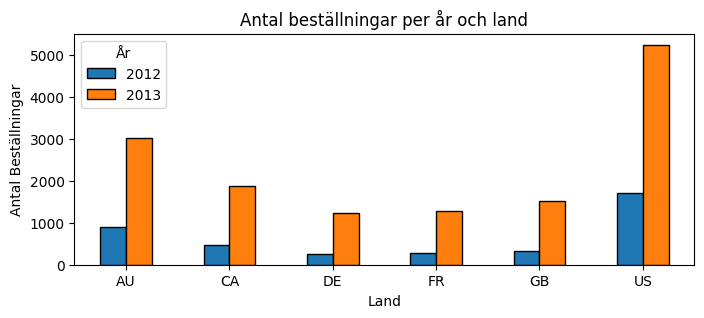

In [41]:
# -- xxxxx -- Plottning av antal beställningar per år (2012 0ch 2013) och land

df=pd.read_sql(sql= '''

SELECT 
	YEAR(S.[OrderDate]) AS [År],
	T.[CountryRegionCode] AS [Land],
	COUNT(S.[CustomerID]) AS [Antal Beställningar]
FROM 
	[Sales].[SalesOrderHeader] AS S
    LEFT OUTER JOIN [Sales].[SalesTerritory] AS T
    ON S.[TerritoryID] = T.[TerritoryID]
    WHERE
    YEAR(S.[OrderDate]) IN (2012, 2013)
GROUP BY 
    YEAR(S.[OrderDate]), T.[CountryRegionCode]
ORDER BY 
	[År], [Land];
            
    ''', con=connection)

pivot_df = df.pivot(index='Land', columns='År', values='Antal Beställningar')
pivot_df.plot(kind='bar', figsize=(8, 3), rot=0, edgecolor='black')
plt.title('Antal beställningar per år och land')
plt.xlabel('Land')
plt.ylabel('Antal Beställningar')
plt.legend(title='År')
plt.show()

In [42]:
# -- 01000 -- Fördelning av antal beställningar per kund

df=pd.read_sql(sql= '''

WITH [CTE_AntalBeställningarPerKund] AS 
	(
		SELECT 
			COUNT([SalesOrderID]) AS [AntalBeställningarPerKund]
		FROM 
			[AdventureWorks2022].[Sales].[SalesOrderHeader]
		GROUP BY 
			[CustomerID]
	)

SELECT 
	[AntalBeställningarPerKund] AS [Antal beställningar per kund],
	COUNT([AntalBeställningarPerKund]) AS [Antal kunder]
FROM 
	[CTE_AntalBeställningarPerKund]
GROUP BY
	[AntalBeställningarPerKund]
ORDER BY 
	[AntalBeställningarPerKund] DESC;

    ''', con=connection)

In [43]:
display(df)

,Antal beställningar per kund,Antal kunder
0,28,2
1,27,11
2,25,1
3,17,7
4,16,14
5,12,64
6,11,10
7,10,8
8,9,10
9,8,149


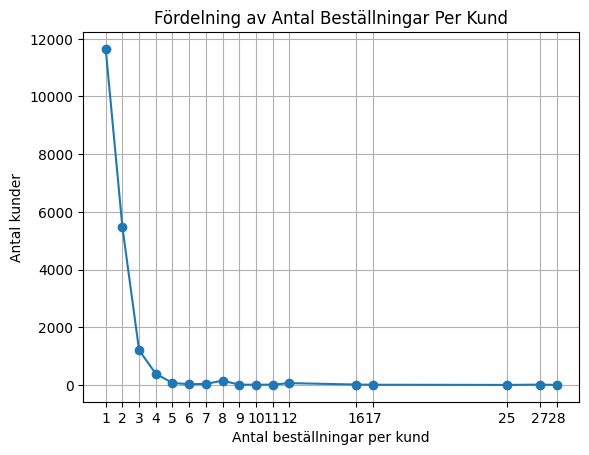

In [44]:
# -- xxxxx -- Plottning av fördelningen av antal beställningar per kund

plt.plot(df['Antal beställningar per kund'], df['Antal kunder'], marker='o')

plt.xticks(df['Antal beställningar per kund'])
plt.xlabel('Antal beställningar per kund')
plt.ylabel('Antal kunder')
plt.title('Fördelning av Antal Beställningar Per Kund')

plt.grid(True)
plt.show()


In [82]:
# -- 02000 -- Årlig försäljningssammanfattning

df = pd.read_sql(sql= """

WITH [CTE_ÅrTotal] AS 
    (
    SELECT 
        YEAR([OrderDate]) AS [OrderDate], 
        COUNT([SalesOrderID]) AS [TotaltAntalBeställningar],
        SUM([SubTotal]) AS [DelSumma],
        SUM([TaxAmt]) AS [Skatt],
        SUM([Freight]) AS [Frakt],
        SUM([TotalDue]) AS [TotaltBelopp]
    FROM 
        [AdventureWorks2022].[Sales].[SalesOrderHeader]
    GROUP BY 
        YEAR([OrderDate])
    )

SELECT 
    [OrderDate] AS [År], 
    [TotaltAntalBeställningar] AS [Antal Beställningar],
    CAST(ROUND([DelSumma], 0) AS int) AS [Del Summa], 
    [Procentandel DelSumma] = CAST(ROUND([DelSumma] * 100.0 / SUM([TotaltBelopp]) OVER (PARTITION BY [OrderDate]), 2) AS decimal(5, 2)),
    CAST(ROUND([Skatt], 0) AS int) AS [Skatt Belopp], 
    [Procentandel Skatt] = CAST(ROUND([Skatt] * 100.0 / SUM([TotaltBelopp]) OVER (PARTITION BY [OrderDate]), 2) AS decimal(5, 2)),
    CAST(ROUND([Frakt], 0) AS int) AS [Frakt],
    [Procentandel Frakt] = CAST(ROUND([Frakt] * 100.0 / SUM([TotaltBelopp]) OVER (PARTITION BY [OrderDate]), 2) AS decimal(5, 2)),
    CAST(ROUND([TotaltBelopp], 0) AS int) AS [Totalt Belopp]
FROM 
    [CTE_ÅrTotal] 
ORDER BY 
    [OrderDate] ASC;
            
            """ , con=connection)

In [83]:
display(df)

,År,Antal Beställningar,Del Summa,Procentandel DelSumma,Skatt Belopp,Procentandel Skatt,Frakt,Procentandel Frakt,Totalt Belopp
0,2011,1607,12641672,89.30,1153545,8.15,360483,2.55,14155700
1,2012,3915,33524301,88.98,3162971,8.40,988428,2.62,37675700
2,2013,14182,43622479,89.09,4071168,8.31,1272240,2.60,48965888
3,2014,11761,20057929,89.47,1799291,8.03,562279,2.51,22419498


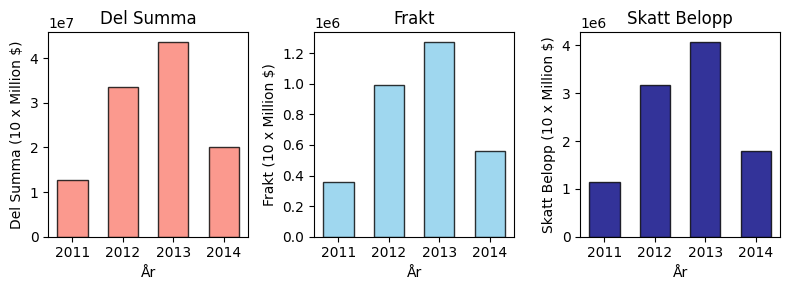

In [87]:
# -- xxxxx -- Plottning av årlig Försäljningssammanfattning

df['År'] = df['År'].astype(str)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax1.bar(df['År'], df['Del Summa'], width=0.6, color='salmon', edgecolor='black', alpha=0.8, linewidth=1)
ax1.set_title('Del Summa')
ax1.set_xlabel('År')
ax1.set_ylabel('Del Summa (10 x Million $)')

ax2.bar(df['År'], df['Frakt'], width=0.6, color='skyblue', edgecolor='black', alpha=0.8, linewidth=1)
ax2.set_title('Frakt')
ax2.set_xlabel('År')
ax2.set_ylabel('Frakt (10 x Million $)')

ax3.bar(df['År'], df['Skatt Belopp'], width=0.6, color='navy', edgecolor='black', alpha=0.8, linewidth=1)
ax3.set_title('Skatt Belopp')
ax3.set_xlabel('År')
ax3.set_ylabel('Skatt Belopp (10 x Million $)')

plt.tight_layout()
plt.show()

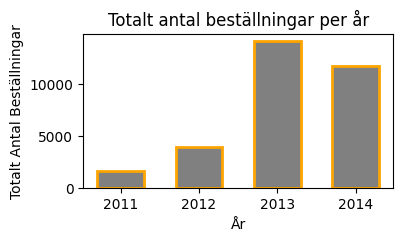

In [81]:
# -- xxxxx -- Plottning av totalt antal beställninga

df['År'] = df['År'].astype(str)

plt.figure(figsize=(4, 2))

plt.bar (df['År'], df['Antal Beställningar'], width=0.6, color='grey', edgecolor='orange', linewidth=2)
plt.title('Totalt antal beställningar per år')
plt.xlabel('År')
plt.ylabel('Totalt Antal Beställningar')

plt.show()

In [49]:
# -- 03000 -- Försäljning per kvartal

df = pd.read_sql(sql= """

WITH [CTE_ÅrTotal] AS 
	(
    SELECT 
        YEAR([OrderDate]) AS [OrderDate], 
        DATEPART(QUARTER, [OrderDate]) AS [Quarter],
        COUNT([SalesOrderID]) AS [TotaltAntalBeställningar],
        SUM([SubTotal]) AS [DelSumma],
        SUM([TaxAmt]) AS [Skatt],
        SUM([Freight]) AS [Frakt],
        SUM([TotalDue]) AS [TotaltBelopp]
    FROM 
		[AdventureWorks2022].[Sales].[SalesOrderHeader]
    GROUP BY 
		YEAR([OrderDate]), DATEPART(QUARTER, [OrderDate])
	)

SELECT 
    [OrderDate] AS [År], 
    [Quarter] AS [Kvartal],
    [TotaltAntalBeställningar] AS [Antal Beställningar],

    CAST(ROUND([DelSumma], 0) AS int) AS [Del Summa], 
    [Procentandel DelSumma] = CAST(ROUND([DelSumma] * 100.0 / SUM([TotaltBelopp]) OVER (PARTITION BY [OrderDate], [Quarter]), 2) AS decimal(5, 2)),

    CAST(ROUND([Skatt], 0) AS int) AS [Skatt Belopp], 
    [Procentandel Skatt] = CAST(ROUND([Skatt] * 100.0 / SUM([TotaltBelopp]) OVER (PARTITION BY [OrderDate], [Quarter]), 2) AS decimal(5, 2)),

    CAST(ROUND([Frakt], 0) AS int) AS [Frakt],
    [Procentandel Frakt] = CAST(ROUND([Frakt] * 100.0 / SUM([TotaltBelopp]) OVER (PARTITION BY [OrderDate], [Quarter]), 2) AS decimal(5, 2)),

    CAST(ROUND([TotaltBelopp], 0) AS int) AS [Totalt Belopp]
FROM 
    [CTE_ÅrTotal] 
ORDER BY 
    [OrderDate], [Quarter] ASC;
            
            """ , con=connection)

In [50]:
display(df)

,År,Kvartal,Antal Beställningar,Del Summa,Procentandel DelSumma,Skatt Belopp,Procentandel Skatt,Frakt,Procentandel Frakt,Totalt Belopp
0,2011,2,184,962717,89.63,84877,7.90,26524,2.47,1074117
1,2011,3,638,5042491,89.29,460998,8.16,144062,2.55,5647551
2,2011,4,785,6636465,89.27,607670,8.17,189897,2.55,7434031
3,2012,1,859,8421802,89.18,778617,8.24,243318,2.58,9443737
4,2012,2,952,8808558,88.66,858619,8.64,268318,2.70,9935495
5,2012,3,1022,9047743,89.01,850791,8.37,265872,2.62,10164407
6,2012,4,1082,7246198,89.11,674944,8.30,210920,2.59,8132061
7,2013,1,1166,7816864,89.11,727636,8.30,227386,2.59,8771886
8,2013,2,1575,10858959,88.83,1040840,8.51,325263,2.66,12225061
9,2013,3,5320,12763227,89.01,1200832,8.37,375260,2.62,14339319


In [51]:
# -- 04000 -- Försäljning per månad 

df = pd.read_sql(sql= """

WITH [CTE_OrderTotalMonth] AS 
	(
    SELECT 
        YEAR([OrderDate]) AS [År],
		MONTH([OrderDate]) AS [Månad],
		COUNT(SalesOrderID) AS [Antal beställningar],
        SUM([TotalDue]) AS [Totalt belopp]
    FROM 
		[AdventureWorks2022].[Sales].[SalesOrderHeader]
    GROUP BY 
		YEAR([OrderDate]), MONTH([OrderDate])
	)

SELECT 
    [År], 
	[Månad],
	[Antal beställningar],
    CAST([Totalt belopp] AS int) AS [Totalt belopp]
FROM 
	[CTE_OrderTotalMonth]
ORDER BY
	[År] ASC, [Månad] ASC;
            
            """ , con=connection)

In [52]:
display(df)

,År,Månad,Antal beställningar,Totalt belopp
0,2011,5,43,567021
1,2011,6,141,507096
2,2011,7,231,2292183
3,2011,8,250,2800576
4,2011,9,157,554792
5,2011,10,327,5156270
6,2011,11,230,815313
7,2011,12,228,1462449
8,2012,1,336,4458337
9,2012,2,219,1649052


In [53]:
# -- 05000 -- Månatlig MAX och MIN Totalt belopp

df = pd.read_sql(sql= """

WITH [CTE_MinMaxOrder] AS 
	(
    SELECT 
        YEAR([OrderDate]) AS [År],
		MONTH([OrderDate]) AS [Månad],
		COUNT(SalesOrderID) AS [Antal ordrar],
        SUM([TotalDue]) AS [Totalt belopp]
    FROM 
		[AdventureWorks2022].[Sales].[SalesOrderHeader]
    GROUP BY 
		YEAR([OrderDate]), MONTH([OrderDate])
	)

SELECT 
	[År], 
	[Månad], 
	[Antal ordrar], 
	CAST([Totalt belopp] AS INT) AS [Max/Min Totalt belopp]
FROM 
	[CTE_MinMaxOrder] 
WHERE 
	[Totalt belopp] = (SELECT MAX([Totalt belopp]) FROM [CTE_MinMaxOrder]) 
	OR 
	[Totalt belopp] = (SELECT MIN([Totalt belopp]) FROM [CTE_MinMaxOrder])
ORDER BY
	[Totalt belopp] DESC;
    
            """ , con=connection)

In [54]:
display(df)

,År,Månad,Antal ordrar,Max/Min Totalt belopp
0,2014,3,2399,8097036
1,2014,6,939,54151


In [55]:
# -- 06000 -- Medelvärdert för beställningar och totalt belopp, månadsvis

df = pd.read_sql(sql= """

SELECT 
    YEAR([OrderDate]) AS [År],
	MONTH([OrderDate]) AS [Månad],
	COUNT(SalesOrderID) AS [Antal beställningar],
    CAST(SUM([TotalDue]) AS INT) AS [Totalt belopp],
	CAST(AVG([TotalDue]) AS INT) AS [Medelvärde]
FROM 
	[AdventureWorks2022].[Sales].[SalesOrderHeader]
GROUP BY 
	YEAR([OrderDate]), MONTH([OrderDate])
ORDER BY 
	[Medelvärde]
        
            """ , con=connection)

In [56]:
display(df)

,År,Månad,Antal beställningar,Totalt belopp,Medelvärde
0,2014,6,939,54151,58
1,2014,2,1756,1478213,842
2,2014,4,2115,1985886,939
3,2013,11,2103,3694668,1757
4,2013,8,1789,3733973,2087
5,2013,12,2050,4560577,2225
6,2014,1,2141,4798028,2241
7,2014,5,2411,6006183,2491
8,2013,10,1968,5374376,2731
9,2013,9,1791,5083505,2838


In [57]:
# -- 06110 -- Medelvärdet för alla försäljningsordrar i företaget 

df = pd.read_sql(sql= """

SELECT CAST(AVG([TotalDue]) AS INT) AS [Totalt Medelvärde]
FROM [AdventureWorks2022].[Sales].[SalesOrderHeader];
        
            """ , con=connection)

In [58]:
display(df)

,Totalt Medelvärde
0,3916


In [89]:
# -- 07000 -- Kvartalsvis fördelning av online beställningar och beställningar av säljare

df = pd.read_sql(sql= """

WITH [CTE_OnlineOrderSP] AS
    (
	SELECT 
		YEAR([OrderDate]) AS [År],
		DATEPART(QUARTER, [OrderDate]) AS [Kvartal],
		SUM(CASE WHEN [OnlineOrderFlag] = 1 THEN 1 ELSE 0 END) AS [OnlineBeställningar],
		SUM(CASE WHEN [OnlineOrderFlag] = 0 THEN 1 ELSE 0 END) AS [Beställningar Av Säljare],
		COUNT(*) AS [Nämnare]
	FROM 
		[AdventureWorks2022].[Sales].[SalesOrderHeader]
	GROUP BY 
		YEAR([OrderDate]), DATEPART(QUARTER, [OrderDate])
    )

SELECT 
	[År],
	[Kvartal],
	[OnlineBeställningar] AS [Online Beställningar],
	[Beställningar Av Säljare] AS [Beställningar Av Säljare],
	CAST(100.0 * [OnlineBeställningar] / [Nämnare] AS decimal(3, 1)) AS [Andel: Online Beställning],
	CAST(100.0 * [Beställningar Av Säljare] / [Nämnare] AS decimal(3, 1)) AS [Andel: Beställningar av Säljare]
FROM
	[CTE_OnlineOrderSP]
ORDER BY 
	[År], [Kvartal];

            """ , con=connection)

In [90]:
display(df)

,År,Kvartal,Online Beställningar,Beställningar Av Säljare,Andel: Online Beställning,Andel: Beställningar av Säljare
0,2011,2,146,38,79.3,20.7
1,2011,3,463,175,72.6,27.4
2,2011,4,592,193,75.4,24.6
3,2012,1,594,265,69.2,30.8
4,2012,2,673,279,70.7,29.3
5,2012,3,705,317,69.0,31.0
6,2012,4,771,311,71.3,28.7
7,2013,1,852,314,73.1,26.9
8,2013,2,1192,383,75.7,24.3
9,2013,3,4866,454,91.5,8.5


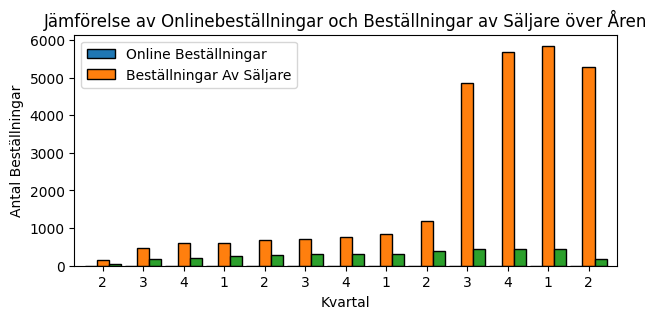

In [92]:
# Plottning av online beställningar och beställningar av säljare, kvartalvis

ax = df[['Kvartal', 'Online Beställningar', 'Beställningar Av Säljare']].plot(kind='bar', figsize=(7, 3), width=0.9, edgecolor='black')

ax.set_xlabel('Kvartal')
ax.set_ylabel('Antal Beställningar')
ax.set_title('Jämförelse av Onlinebeställningar och Beställningar av Säljare över Åren')
ax.legend(["Online Beställningar", "Beställningar Av Säljare"], loc='upper left')
ax.set_xticklabels(df['Kvartal'], rotation=0)
plt.show()



In [62]:
# -- 08000 -- Försäljningsstatistik per Kvartal - Medelvärde och Standardavvikelse

df = pd.read_sql(sql= """

SELECT 
	YEAR([OrderDate]) AS [År], 
	DATEPART(QUARTER, [OrderDate]) AS [Kvartal],
	CAST(AVG([TotalDue]) AS int) AS [Genomsnitt Totalt belopp)],
	CAST(STDEV([TotalDue]) AS int) AS [Standardavvikelse Totalt belopp]
FROM 
	[AdventureWorks2022].[Sales].[SalesOrderHeader] 
GROUP BY  
	YEAR([OrderDate]), DATEPART(QUARTER, [OrderDate])
ORDER BY 
	[År], [Kvartal];

            """ , con=connection)

In [63]:
display(df)

,År,Kvartal,Genomsnitt Totalt belopp),Standardavvikelse Totalt belopp
0,2011,2,5838,7941
1,2011,3,8852,15420
2,2011,4,9470,17731
3,2012,1,10994,17976
4,2012,2,10436,21773
5,2012,3,9946,22227
6,2012,4,7516,16604
7,2013,1,7523,17531
8,2013,2,7762,19482
9,2013,3,2695,11144


In [64]:
# -- 09000 -- Median (50:e percentilen) av totalt belopp

df = pd.read_sql(sql= """

SELECT  DISTINCT
		PERCENTILE_CONT(0.5) 
		WITHIN GROUP (ORDER BY [TotalDue]) 
		OVER (PARTITION BY YEAR([OrderDate]), DATEPART(QUARTER, [OrderDate]))
		AS [Median Totalt belopp], 
		YEAR([OrderDate]) AS [År], 
		DATEPART(QUARTER, [OrderDate]) AS [Kvartal]
FROM 
		[AdventureWorks2022].[Sales].[SalesOrderHeader]
ORDER BY 
		[År], [Kvartal];

            """ , con=connection)

In [65]:
display(df)

,Median Totalt belopp,År,Kvartal
0,3953.98840,2011,2
1,3953.98840,2011,3
2,3953.98840,2011,4
3,3953.98840,2012,1
4,3756.98900,2012,2
5,2410.62660,2012,3
6,2288.91870,2012,4
7,2288.91870,2013,1
8,2288.91870,2013,2
9,87.27290,2013,3


In [66]:
# -- 01110 -- Antal beställningar och det totala försäljningsbeloppet per land för varje säljare

df=pd.read_sql(sql='''

SELECT 
	A.[SalesPersonID], 
	C.[FirstName], 
	C.[LastName], 
	D.[CountryRegionCode] AS [Land], 
	COUNT(A.[SalesPersonID]) AS [Antal Beställningar], 
	CAST(SUM(A.TotalDue) AS int) AS [Total Försäljning]
FROM 
	[AdventureWorks2022].[Sales].[SalesOrderHeader] AS A
	INNER JOIN [AdventureWorks2022].[Sales].[SalesPerson] AS B
	ON A.[SalesPersonID] = B.[BusinessEntityID]
	INNER JOIN [AdventureWorks2022].[Person].[Person] AS C
	ON B.[BusinessEntityID] = C.[BusinessEntityID]
	LEFT JOIN [AdventureWorks2022].[Sales].[SalesTerritory] AS D
	ON B.[TerritoryID] = D.[TerritoryID]
GROUP BY 
	A.[SalesPersonID], C.[FirstName], C.[LastName], D.[CountryRegionCode]
HAVING 
	A.[SalesPersonID] IS NOT NULL
ORDER BY 
	[Total Försäljning];
    
    ''', con=connection)

In [67]:
display(df)

,SalesPersonID,FirstName,LastName,Land,Antal Beställningar,Total Försäljning
0,285,Syed,Abbas,None,16,195529
1,287,Amy,Alberts,None,39,826417
2,274,Stephen,Jiang,None,48,1235934
3,286,Lynn,Tsoflias,AU,109,1606441
4,288,Rachel,Valdez,DE,130,2062393
5,284,Tete,Mensa-Annan,US,140,2608116
6,280,Pamela,Ansman-Wolfe,US,95,3748246
7,278,Garrett,Vargas,CA,234,4069422
8,283,David,Campbell,US,189,4207895
9,290,Ranjit,Varkey Chudukatil,FR,175,5087977


In [68]:
# -- 01120 -- Statistisk analys (konfidensintervall), Totalt

df=pd.read_sql(sql='''

WITH [CTE_konfidensintervall] AS 
	(
    SELECT 
        COUNT([TotalDue]) AS [n],
        CAST(AVG([TotalDue]) AS int) AS [Medelvärde],
        CAST(STDEV([TotalDue]) AS int) AS [Standardavvikelse]
    FROM 
        [AdventureWorks2022].[Sales].[SalesOrderHeader]
	) 

SELECT 
	[Medelvärde], 
	[Standardavvikelse],
	CAST(([Medelvärde]) - (1.96 * [Standardavvikelse] / SQRT(n)) AS INT) AS [KI_Nedre],
    CAST(([Medelvärde]) + (1.96 * [Standardavvikelse] / SQRT(n)) AS INT) AS [KI_Övre]
FROM 
	[CTE_konfidensintervall];
        
    ''', con=connection)

In [69]:
display(df)

,Medelvärde,Standardavvikelse,KI_Nedre,KI_Övre
0,3916,12515,3777,4054


In [70]:
# -- 01121 -- Statistisk analys (Median), Totalt

df=pd.read_sql(sql='''

WITH [CTE_Median] AS 
	(
    SELECT TOP 50 PERCENT CAST([TotalDue] AS INT) AS [Median]
    FROM [AdventureWorks2022].[Sales].[SalesOrderHeader]
    ORDER BY [TotalDue] ASC
	)
SELECT TOP 1 [Median]
FROM CTE_Median ORDER BY [Median] DESC;
        
    ''', con=connection)

In [71]:
display(df)

,Median
0,865


In [72]:
# -- 01122 -- Statistisk analys (konfidensintervall), Månadsvist

df=pd.read_sql(sql='''

SELECT 
    YEAR([OrderDate]) AS [År], 
	MONTH([OrderDate]) AS [Månad], 
	COUNT([SalesOrderID]) AS [Antal beställningar],
    CAST(AVG([TotalDue]) AS INT) AS [Medelvärde Totalt belopp],
    CAST(STDEV([TotalDue]) AS INT) AS [Standardavvikelse Totalt belopp],
    CAST((AVG([TotalDue]) - 1.96 * STDEV([TotalDue]) / SQRT(COUNT([TotalDue]))) AS INT) AS [KI_Nedre],
    CAST((AVG([TotalDue]) + 1.96 * STDEV([TotalDue]) / SQRT(COUNT([TotalDue]))) AS INT) AS [KI_Övre]
FROM 
    [AdventureWorks2022].[Sales].[SalesOrderHeader] 
GROUP BY  
    YEAR([OrderDate]), MONTH([OrderDate])
ORDER BY 
    [År], [Månad];
    
    ''', con=connection)

In [73]:
display(df)

,År,Månad,Antal beställningar,Medelvärde Totalt belopp,Standardavvikelse Totalt belopp,KI_Nedre,KI_Övre
0,2011,5,43,13187,14130,8963,17410
1,2011,6,141,3596,944,3440,3752
2,2011,7,231,9923,17168,7708,12136
3,2011,8,250,11202,17632,9016,13388
4,2011,9,157,3534,1030,3372,3694
5,2011,10,327,15768,24807,13079,18457
6,2011,11,230,3545,1016,3413,3676
7,2011,12,228,6414,9947,5123,7705
8,2012,1,336,13269,19651,11167,15370
9,2012,2,219,7530,11876,5956,9102


In [ ]:
# -- 01133 -- En funktion för att beräkna konfidensintervall för skillnaden mellan 
# medelvärden för två angivna år i tabellen: [AdventureWorks2022].[Sales].[SalesOrderHeader].

connection.execute( '''

CREATE FUNCTION dbo.SkillnadMedelvärde (@År1 INT, @År2 INT) 
RETURNS @SkillnadsIntervall TABLE (SkillnadÖvre INT, SkillnadNedre INT)
AS
BEGIN
    DECLARE @SkillnadÖvre INT;
    DECLARE @SkillnadNedre INT;

    SELECT @SkillnadÖvre = 
        ( -- (Medelvärde1 - Medelvärde2) +  z. sqrt [(standardavvickelse1)^2/n1 + (standardavvickelse2)^2/n2]
            ( -- Medelvärde1 - Medelvärde2
                CAST(AVG(CASE WHEN YEAR([OrderDate]) = @År1 THEN [TotalDue] END) AS INT)
                -
                CAST(AVG(CASE WHEN YEAR([OrderDate]) = @År2 THEN [TotalDue] END) AS INT)
            )
            +
            ( -- Z (1.96 för konfidensgrad 95 procent
                1.96
                *
                SQRT
                    (
                        ( -- (standardavvickelse1)^2/n1
                            POWER(STDEV(CASE WHEN YEAR([OrderDate]) = @År1 THEN [TotalDue] END), 2)
                            / NULLIF(COUNT(CASE WHEN YEAR([OrderDate]) = @År1 THEN [SalesOrderID] END), 0)
                        )
                        +
                        ( -- (standardavvickelse2)^2/n2
                            POWER(STDEV(CASE WHEN YEAR([OrderDate]) = @År2 THEN [TotalDue] END), 2)
                            / NULLIF(COUNT(CASE WHEN YEAR([OrderDate]) = @År2 THEN [SalesOrderID] END), 0)
                        )
                    )
            )
        )
    FROM [AdventureWorks2022].[Sales].[SalesOrderHeader]
    WHERE YEAR([OrderDate]) IN (@År1, @År2);

   
    SELECT @SkillnadNedre = 
        ( -- (Medelvärde1 - Medelvärde2) -  z. sqrt [(standardavvickelse1)^2/n1 + (standardavvickelse2)^2/n2]
            ( -- Medelvärde1 - Medelvärde2
                CAST(AVG(CASE WHEN YEAR([OrderDate]) = @År1 THEN [TotalDue] END) AS INT)
                -
                CAST(AVG(CASE WHEN YEAR([OrderDate]) = @År2 THEN [TotalDue] END) AS INT)
            )
            -
            ( -- Z (1.96 för konfidensgrad 95 procent
                1.96
                *
                SQRT
                    (
                        ( -- (standardavvickelse1)^2/n1
                            POWER(STDEV(CASE WHEN YEAR([OrderDate]) = @År1 THEN [TotalDue] END), 2)
                            / NULLIF(COUNT(CASE WHEN YEAR([OrderDate]) = @År1 THEN [SalesOrderID] END), 0)
                        )
                        +
                        ( -- (standardavvickelse2)^2/n2
                            POWER(STDEV(CASE WHEN YEAR([OrderDate]) = @År2 THEN [TotalDue] END), 2)
                            / NULLIF(COUNT(CASE WHEN YEAR([OrderDate]) = @År2 THEN [SalesOrderID] END), 0)
                        )
                    )
            )
        )
    FROM [AdventureWorks2022].[Sales].[SalesOrderHeader]
    WHERE YEAR([OrderDate]) IN (@År1, @År2);

	INSERT INTO @SkillnadsIntervall (SkillnadÖvre, SkillnadNedre) VALUES (@SkillnadÖvre, @SkillnadNedre)

    RETURN;
END;

    ''')

In [ ]:
df=pd.read_sql(sql='''
SELECT SkillnadÖvre, SkillnadNedre
FROM dbo.SkillnadMedelvärde(2012, 2013);
''', con=connection)

In [ ]:
display(df)